
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [1]:
#
# Import relevant Libraries
#
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Conv2D, Reshape
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential

In [2]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.

(x_train, _), (x_test, _) = mnist.load_data()

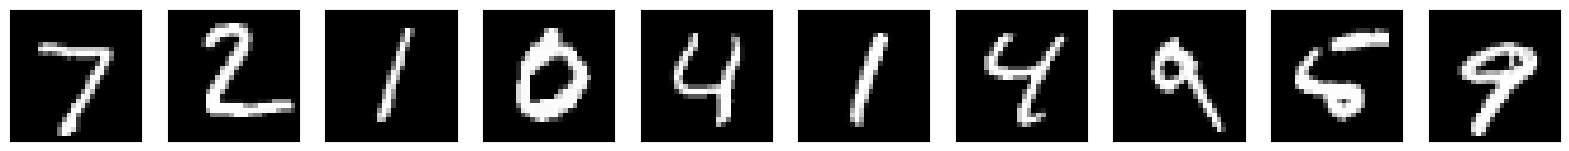

In [3]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [4]:
# Normalize train data - Divide by 255
x_train = x_train/255

# Normalize test data - Divide by 255
x_test = x_test/255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [5]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choise
encoder.add(Dense(128, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(32, activation='relu'))

#
#

# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#
encoder.add(Dense(16, activation='relu'))
encoder.add(Dense(25, activation='relu'))

2024-03-01 13:40:09.952787: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-01 13:40:09.952858: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-01 13:40:09.952871: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-01 13:40:09.952952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 13:40:09.953050: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
encoder.output.shape

TensorShape([None, 25])

In [7]:
# print the encoder model
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 25)                425       
                                                                 
Total params: 111769 (436.60 KB)
Trainable params: 11176

In [8]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#

decoder.add(Dense(16, activation='relu'))
decoder.add(Dense(32, activation='relu'))
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(128, activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [9]:
# print the decoder model
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1300      
                                                                 
 dense_6 (Dense)             (None, 16)                816       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)           

In [10]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [11]:
# print the autoencoder model
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 25)                111769    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            114228    
                                                                 
Total params: 225997 (882.80 KB)
Trainable params: 225997 (882.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(optimizer='Adam', loss= 'BinaryCrossentropy')

In [28]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
history = autoencoder.fit(x= x_train, y= x_train, epochs=30, batch_size=128, shuffle=True, verbose=1)

Epoch 1/30
469/469 [==============================] - 7s 16ms/step - loss: 2.7995
Epoch 2/30
469/469 [==============================] - 8s 17ms/step - loss: 2.7995
Epoch 3/30
469/469 [==============================] - 8s 16ms/step - loss: 2.7995
Epoch 4/30
469/469 [==============================] - 8s 16ms/step - loss: 2.7995
Epoch 5/30
469/469 [==============================] - 8s 16ms/step - loss: 2.7995
Epoch 6/30
469/469 [==============================] - 8s 16ms/step - loss: 2.7995
Epoch 7/30
469/469 [==============================] - 8s 16ms/step - loss: 2.7995
Epoch 8/30
469/469 [==============================] - 8s 17ms/step - loss: 2.7995
Epoch 9/30
469/469 [==============================] - 8s 16ms/step - loss: 2.7995
Epoch 10/30
469/469 [==============================] - 8s 17ms/step - loss: 2.7995
Epoch 11/30
469/469 [==============================] - 8s 17ms/step - loss: 2.7995
Epoch 12/30
469/469 [==============================] - 8s 18ms/step - loss: 2.7995
Epoch 13/30
4

In [29]:
autoencoder.predict

<bound method Model.predict of <keras.src.engine.sequential.Sequential object at 0x29f0be160>>

313/313 [==============================] - 1s 3ms/step


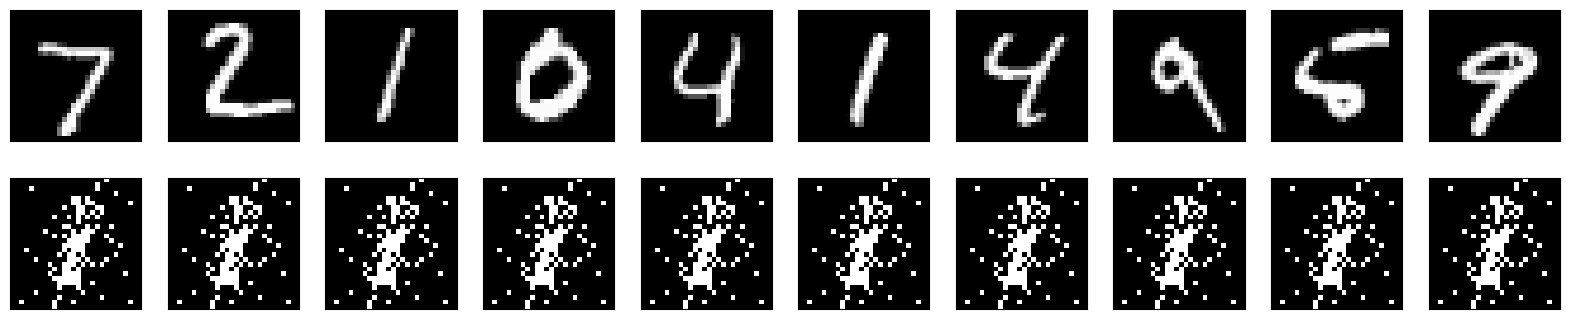

In [30]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    #
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    

plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [31]:
from tensorflow.keras.layers import GaussianNoise

In [43]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:],training=True)

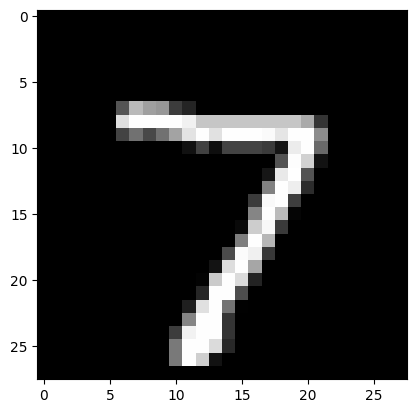

In [33]:
plt.imshow(x_test[0])

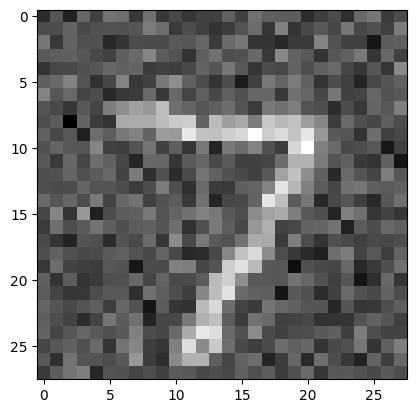

In [34]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [36]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
#
encoder.add(Dense(128, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(32, activation='relu'))
encoder.add(Dense(16, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [38]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
#

decoder.add(Dense(16, activation='relu'))
decoder.add(Dense(32, activation='relu'))
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(128, activation='relu'))


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [40]:
noise_remover = autoencoder

In [41]:
# Compile the network as earlier
noise_remover.compile(optimizer='Adam', loss= 'BinaryCrossentropy')

In [44]:
# Fit the network as earlier.
noise_remover.fit(x=noisey, y=x_test, epochs=10, batch_size=128, shuffle=True, verbose=1)

Epoch 1/10


2024-03-01 14:04:31.865666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 2s 14ms/step - loss: 2.8055
Epoch 2/10
79/79 [==============================] - 1s 16ms/step - loss: 2.8055
Epoch 3/10
79/79 [==============================] - 1s 17ms/step - loss: 2.8055
Epoch 4/10
79/79 [==============================] - 1s 16ms/step - loss: 2.8055
Epoch 5/10
79/79 [==============================] - 1s 17ms/step - loss: 2.8055
Epoch 6/10
79/79 [==============================] - 1s 17ms/step - loss: 2.8055
Epoch 7/10
79/79 [==============================] - 2s 19ms/step - loss: 2.8055
Epoch 8/10
79/79 [==============================] - 1s 16ms/step - loss: 2.8055
Epoch 9/10
79/79 [==============================] - 1s 17ms/step - loss: 2.8055
Epoch 10/10
79/79 [==============================] - 1s 17ms/step - loss: 2.8055


In [45]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


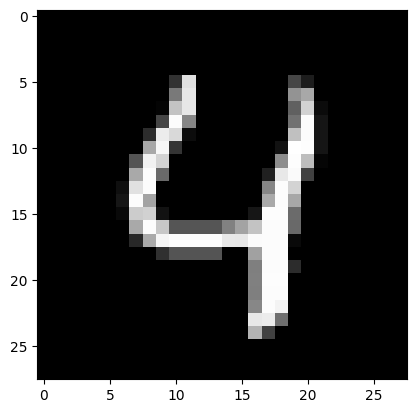

The Noisey Version


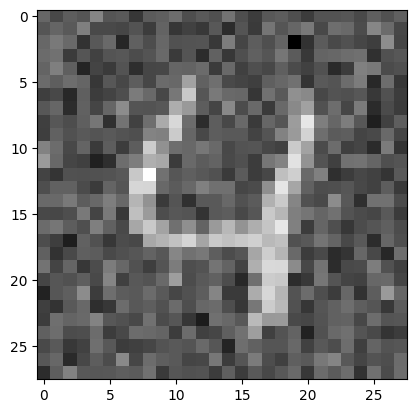

After going through denoiser


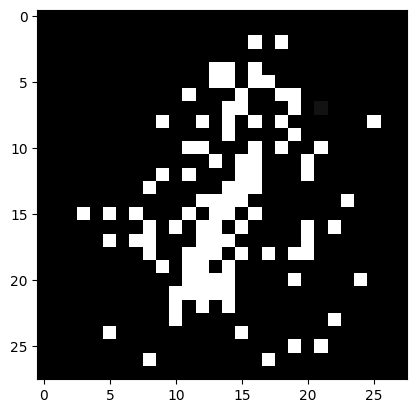

In [46]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.